# HR Analytics Report

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Load The Data
df = pd.read_csv("HR.csv")

# Display all the columns in data 
pd.set_option('display.max_columns', None)


# Data Preprocessing

In [73]:
df.shape

(1480, 38)

In [74]:
df.head(10)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0
5,RM973,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,1,1368,4,Female,97,3,1,Laboratory Technician,4,Single,1611,Upto 5k,19305,1,Y,No,15,3,3,80,0,0,5,4,0,0,0,0.0
6,RM1154,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,1,1624,2,Female,70,3,1,Sales Representative,4,Single,1569,Upto 5k,18420,1,Y,Yes,12,3,3,80,0,0,2,4,0,0,0,0.0
7,RM1312,18,18-25,No,Non-Travel,1431,Research & Development,14,3,Medical,1,1839,2,Female,33,3,1,Research Scientist,3,Single,1514,Upto 5k,8018,1,Y,No,16,3,3,80,0,0,4,1,0,0,0,0.0
8,RM128,19,18-25,Yes,Travel_Rarely,528,Sales,22,1,Marketing,1,167,4,Male,50,3,1,Sales Representative,3,Single,1675,Upto 5k,26820,1,Y,Yes,19,3,4,80,0,0,2,2,0,0,0,0.0
9,RM150,19,18-25,No,Travel_Rarely,1181,Research & Development,3,1,Medical,1,201,2,Female,79,3,1,Laboratory Technician,2,Single,1483,Upto 5k,16102,1,Y,No,14,3,4,80,0,1,3,3,1,0,0,0.0


In [75]:
# Checking for nulls and show the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [76]:
# Show the null rows only
rows_with_any_null = df[df.isnull().any(axis=1)]
rows_with_any_null

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
28,RM024,21,18-25,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,30,3,Male,96,3,1,Research Scientist,4,Single,1232,Upto 5k,19281,1,Y,No,14,3,4,80,0,0,6,3,0,0,0,NaN
31,RM363,21,18-25,No,Non-Travel,895,Sales,9,2,Medical,1,484,1,Male,39,3,1,Sales Representative,4,Single,2610,Upto 5k,2851,1,Y,No,24,4,3,80,0,3,3,2,3,2,2,NaN
45,RM207,22,18-25,No,Travel_Rarely,1136,Research & Development,5,3,Life Sciences,1,284,4,Male,60,4,1,Research Scientist,2,Divorced,2328,Upto 5k,12392,1,Y,Yes,16,3,1,80,1,4,2,2,4,2,2,NaN
99,RM139,25,18-25,No,Travel_Rarely,959,Sales,28,3,Life Sciences,1,183,1,Male,41,2,2,Sales Executive,3,Married,8639,5k-10k,24835,2,Y,No,18,3,4,80,0,6,3,3,2,2,2,NaN
100,RM256,25,18-25,No,Travel_Rarely,685,Research & Development,1,3,Life Sciences,1,350,1,Female,62,3,2,Manufacturing Director,3,Married,4898,Upto 5k,7505,0,Y,No,12,3,4,80,2,5,3,3,4,2,1,NaN
103,RM406,25,18-25,Yes,Travel_Rarely,688,Research & Development,3,3,Medical,1,538,1,Male,91,3,1,Laboratory Technician,1,Married,4031,Upto 5k,9396,5,Y,No,13,3,3,80,1,6,5,3,2,2,0,NaN
222,RM405,28,26-35,No,Travel_Rarely,1300,Research & Development,17,2,Medical,1,536,3,Male,79,3,2,Laboratory Technician,1,Divorced,4558,Upto 5k,13535,1,Y,No,12,3,4,80,1,10,2,3,10,0,1,NaN
262,RM072,29,26-35,No,Travel_Rarely,1328,Research & Development,2,3,Life Sciences,1,94,3,Male,76,3,1,Research Scientist,2,Married,2703,Upto 5k,4956,0,Y,No,23,4,4,80,1,6,3,3,5,4,0,NaN
264,RM206,29,26-35,Yes,Travel_Rarely,121,Sales,27,3,Marketing,1,283,2,Female,35,3,3,Sales Executive,4,Married,7639,5k-10k,24525,1,Y,No,22,4,4,80,3,10,3,2,10,4,1,NaN
268,RM253,29,26-35,No,Travel_Rarely,665,Research & Development,15,3,Life Sciences,1,346,3,Male,60,3,1,Research Scientist,4,Single,2340,Upto 5k,22673,1,Y,No,19,3,1,80,0,6,1,3,6,5,1,NaN


In [77]:
# Check summary statistics before filling null values
# This helps us assess if filling missing values (e.g., with median) would significantly alter the distribution

df['YearsWithCurrManager'].describe()

count    1423.000000
mean        4.118060
std         3.555484
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

In [78]:
# Fill missing values in 'YearsWithCurrManager' using the median
# Median is used to avoid skewing the data due to outliers 
df['YearsWithCurrManager'].fillna(df['YearsWithCurrManager'].median(), inplace=True)

# Recheck the summary statistics after filling nulls
# This confirms whether the imputation had any noticeable effect
df['YearsWithCurrManager'].describe()

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3317/612726455.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsWithCurrManager'].fillna(df['YearsWithCurrManager'].median(), inplace=True)


count    1480.000000
mean        4.075000
std         3.492935
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

In [79]:
# Checking for any nulls 
df.isnull().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

In [80]:
# Check for duplicated data in the entire DataFrame
dup = df.duplicated().sum()
print(f"There is :{dup} duplicated")

There is :7 duplicated


In [81]:
# Display only the duplicated rows for inspection
duplicates = df[df.duplicated()]
duplicates 

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
211,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5k-10k,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3.0
328,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,4,Female,73,2,1,Research Scientist,1,Single,3785,Upto 5k,8489,1,Y,No,14,3,2,80,0,5,3,1,5,4,0,4.0
458,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,5k-10k,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7.0
655,RM1470,34,26-35,No,TravelRarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,Upto 5k,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2.0
954,RM1463,39,36-45,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,10k-15k,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6.0
1305,RM1469,49,46-55,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,5k-10k,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8.0
1336,RM1462,50,46-55,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,4,Male,39,2,3,Sales Executive,1,Divorced,10854,10k-15k,16586,4,Y,Yes,13,3,2,80,1,20,3,3,3,2,2,0.0


In [82]:
# Transpose the DataFrame to turn columns into rows,
# then check for duplicated rows (which means duplicated columns in the original DataFrame)
duplicate_columns = df.T[df.T.duplicated()]

# Print the names of duplicated columns (if any)

print("Duplicated columns:")
print(duplicate_columns.index.tolist())

Duplicated columns:
[]


In [83]:
# Identify all duplicated rows in the DataFrame
# keep=False marks all instances of duplication (not just the second occurrence)
duplicated_rows = df[df.duplicated(keep=False)]

# Display the duplicated rows for review
duplicated_rows

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
210,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5k-10k,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3.0
211,RM1468,27,26-35,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5k-10k,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3.0
327,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,4,Female,73,2,1,Research Scientist,1,Single,3785,Upto 5k,8489,1,Y,No,14,3,2,80,0,5,3,1,5,4,0,4.0
328,RM1461,29,26-35,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,4,Female,73,2,1,Research Scientist,1,Single,3785,Upto 5k,8489,1,Y,No,14,3,2,80,0,5,3,1,5,4,0,4.0
457,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,5k-10k,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7.0
458,RM1464,31,26-35,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,5k-10k,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7.0
654,RM1470,34,26-35,No,TravelRarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,Upto 5k,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2.0
655,RM1470,34,26-35,No,TravelRarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,Upto 5k,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2.0
952,RM1463,39,36-45,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,10k-15k,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6.0
954,RM1463,39,36-45,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,12031,10k-15k,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6.0


In [84]:
# Drop all duplicated rows from the DataFrame
# keep='first' retains the first occurrence of each duplicate and removes the rest
df = df.drop_duplicates(keep='first')

In [85]:
# Checking for other duplicates
dup = df.duplicated().sum()
print(f"There is : {dup} duplicated")

There is : 0 duplicated


In [86]:
# Display the number of rows and columns after preprocessing
print(f"DataFrame shape after preprocessing: {df.shape[0]} rows, {df.shape[1]} columns")

DataFrame shape after preprocessing: 1473 rows, 38 columns


# EDA & Data Visualisation

### Employee Diversity & Status Analysis

In [87]:
num_emp_gender = df["Gender"].value_counts()
num_emp_gender

Gender
Male      884
Female    589
Name: count, dtype: int64

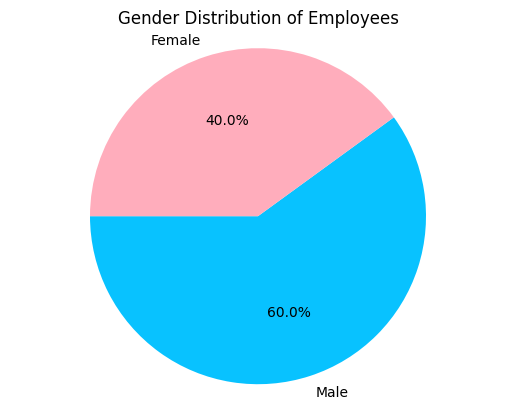

In [88]:
plt.pie(num_emp_gender, 
       labels = num_emp_gender.index,
       autopct='%1.1f%%',
       startangle=180,
       colors=['#08C2FF', '#FFADBC'])

plt.title('Gender Distribution of Employees')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

The pie chart shows the gender distribution among employees. It indicates a higher representation of Male employees, accounting for approximately 60% of the workforce. This insight can be useful when assessing diversity and inclusion within the organization

In [89]:
age = df["AgeGroup"].value_counts()
age

AgeGroup
26-35    607
36-45    470
46-55    226
18-25    123
55+       47
Name: count, dtype: int64

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3317/3221382534.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='AgeGroup', palette=custom_palette)
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3317/3221382534.py:3: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data=df, x='AgeGroup', palette=custom_palette)


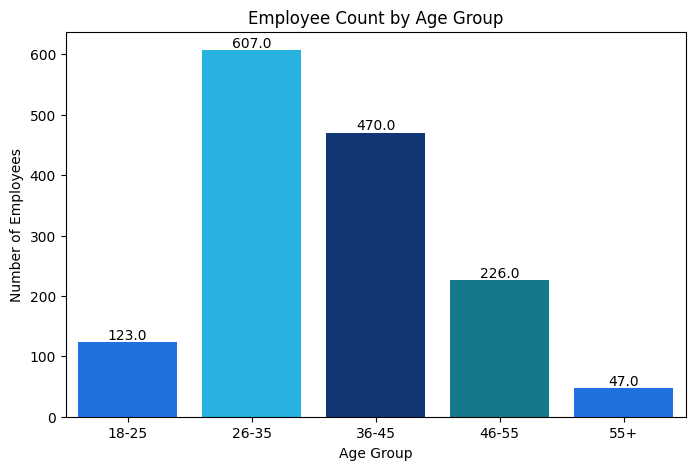

In [90]:
plt.figure(figsize=(8, 5))
custom_palette = ['#006BFF', '#08C2FF', '#003285',"#00879E"]
ax = sns.countplot(data=df, x='AgeGroup', palette=custom_palette)

# Add the actual count numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.title('Employee Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()

  Most employees are aged 26–35, followed by 36–45, making up the core of the workforce. Younger (18–25) and older (55+) employees are underrepresented, suggesting a mid-career dominant staff with fewer fresh graduates or nearing-retirement professionals.

In [91]:
emp_status = df["MaritalStatus"].value_counts()
emp_status

MaritalStatus
Married     675
Single      471
Divorced    327
Name: count, dtype: int64

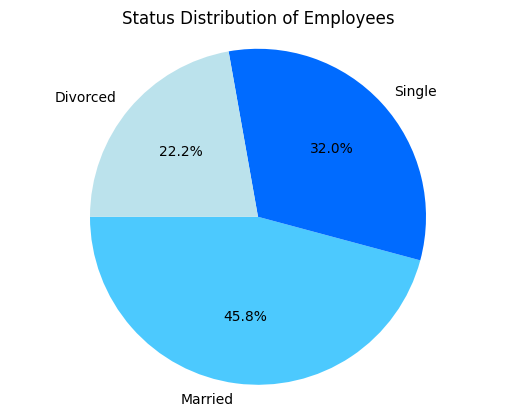

In [92]:
plt.pie(emp_status, 
       labels = emp_status.index,
       autopct='%1.1f%%',
       startangle=180,
       colors = ["#4CC9FE","#006BFF","#BBE2EC"])

plt.title('Status Distribution of Employees')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

The majority of employees are Married (675), followed by Single (471), and Divorced (327). This indicates a workforce with a significant number of employees potentially balancing family responsibilities, which may influence preferences for benefits, flexibility, and work-life balance policies.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3317/1735532902.py:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(data=df, x='AgeGroup', hue='MaritalStatus', palette=custom_palette)


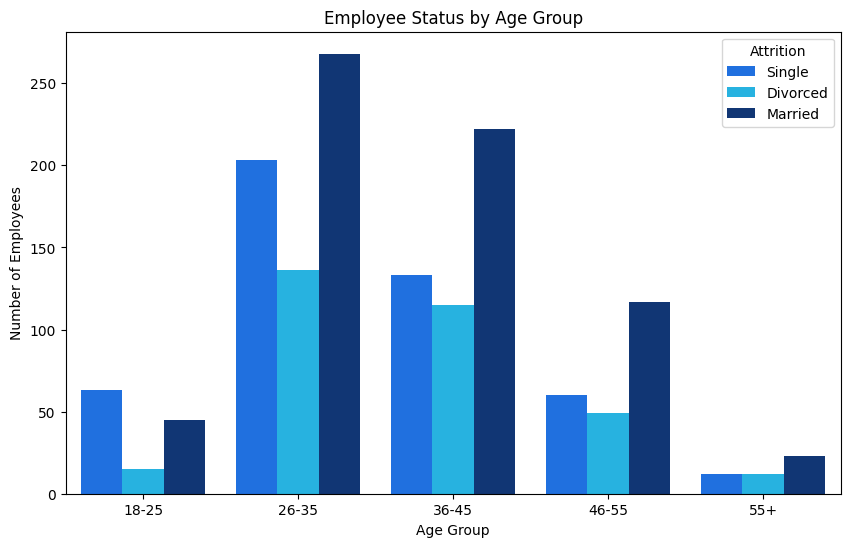

In [93]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeGroup', hue='MaritalStatus', palette=custom_palette)
plt.title('Employee Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.show()

Employees aged 26–35 have the highest count across all marital statuses, especially among Married and Single individuals.

The Married group consistently dominates from age 26–55, suggesting career stability and family commitment in mid-age brackets.

The 18–25 group is primarily Single, as expected, while Divorced employees are more concentrated in the 36–45 age group.

The 55+ age group is the smallest across all statuses, indicating either retirement or a lower retention of older employees.

### Departments at a Glance

In [94]:
Department = df["Department"].value_counts()
Department

Department
Research & Development    963
Sales                     447
Human Resources            63
Name: count, dtype: int64

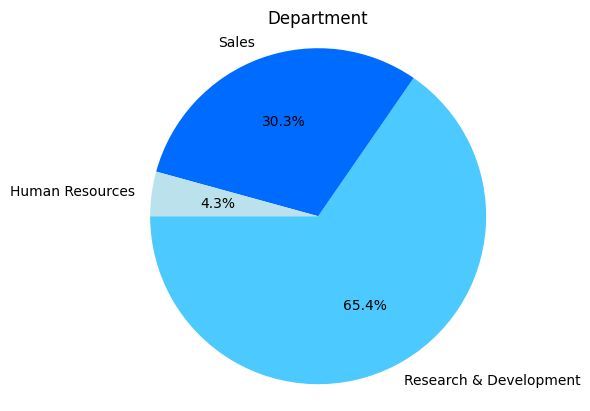

In [95]:
plt.pie(Department, 
       labels = Department.index,
       autopct='%1.1f%%',
       startangle=180,
       colors = ["#4CC9FE","#006BFF","#BBE2EC"])

plt.title('Department')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

The Research & Development department holds the majority of employees, highlighting its central role in the organization’s operations.
Sales comes next, reflecting its importance in revenue generation but with a leaner team.
Human Resources has the smallest share, aligning with its more specialized support function within the company.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3317/4251766093.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overtime_by_dept.values, y=overtime_by_dept.index, palette=custom_palette)
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3317/4251766093.py:8: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x=overtime_by_dept.values, y=overtime_by_dept.index, palette=custom_palette)


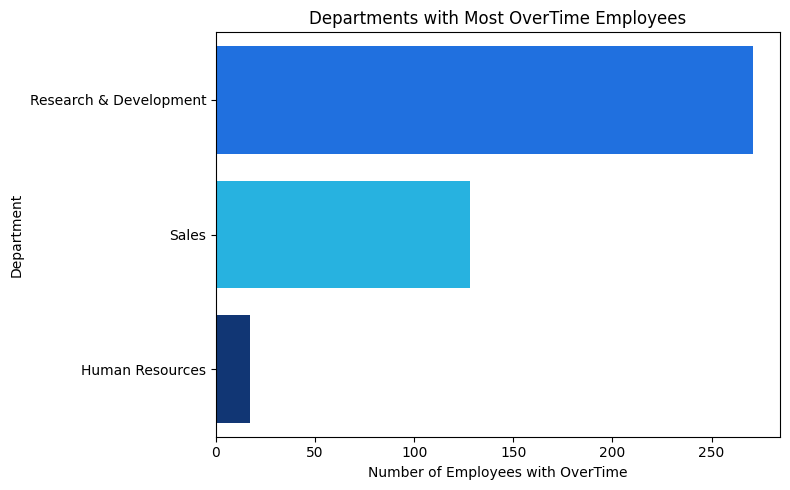

In [96]:
# Filter only employees who work overtime
overtime_df = df[df['OverTime'] == 'Yes']

# Count OverTime employees per department
overtime_by_dept = overtime_df['Department'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=overtime_by_dept.values, y=overtime_by_dept.index, palette=custom_palette)
plt.title('Departments with Most OverTime Employees')
plt.xlabel('Number of Employees with OverTime')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

Research & Development has the highest number of employees working overtime, showing a heavy workload or critical project demands.
Sales also has a notable count, likely due to performance-driven targets.
Human Resources shows minimal overtime, suggesting a more stable workload or stricter work-hour policies.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3317/2396398517.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=satisfaction_by_dept.values, y=satisfaction_by_dept.index, palette=custom_palette)
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3317/2396398517.py:8: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x=satisfaction_by_dept.values, y=satisfaction_by_dept.index, palette=custom_palette)


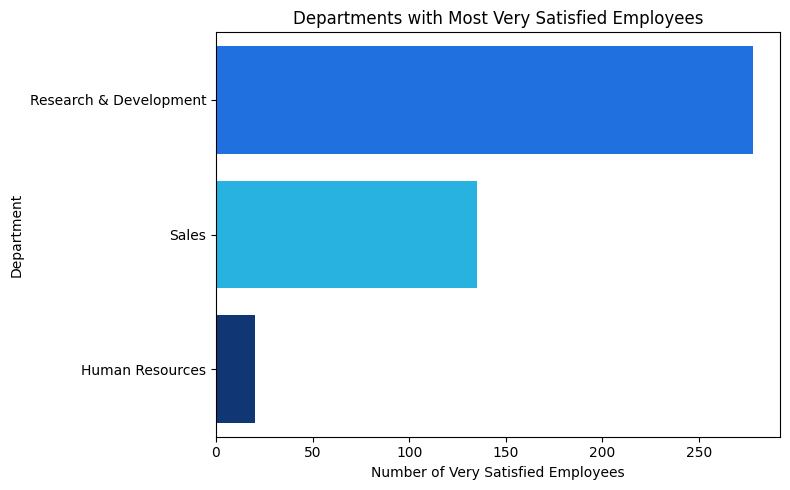

In [97]:
# Filter employees with RelationshipSatisfaction = 4 (very satisfied)
satisfied_df = df[df['RelationshipSatisfaction'] == 4]

# Count per department
satisfaction_by_dept = satisfied_df['Department'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=satisfaction_by_dept.values, y=satisfaction_by_dept.index, palette=custom_palette)
plt.title('Departments with Most Very Satisfied Employees')
plt.xlabel('Number of Very Satisfied Employees')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

Research & Development not only has the highest number of employees working overtime but also the highest number of very satisfied employees, suggesting a strong sense of engagement and fulfillment despite long hours.

Sales ranks second in both overtime and satisfaction, reflecting a motivated and generally satisfied team.

Human Resources has the lowest counts in both metrics, pointing to lighter workloads and possibly less active engagement.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3317/4193169730.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=satisfaction_df, x='EnvironmentSatisfaction', y='Department', palette=custom_palette, ax=axes[0])
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3317/4193169730.py:8: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(data=satisfaction_df, x='EnvironmentSatisfaction', y='Department', palette=custom_palette, ax=axes[0])
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3317/4193169730.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=satisfaction_df, x='RelationshipSatisfactio

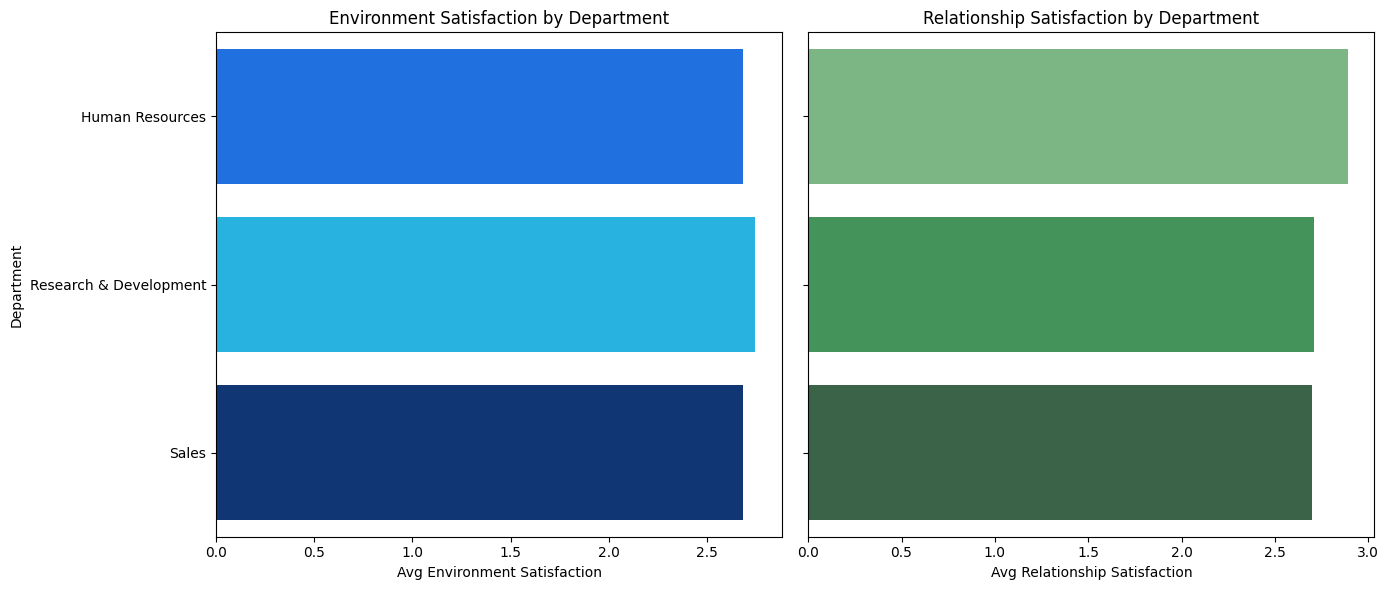

In [98]:
# Calculate average satisfaction scores by department
satisfaction_df = df.groupby('Department')[['EnvironmentSatisfaction', 'RelationshipSatisfaction']].mean().reset_index()

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot EnvironmentSatisfaction
sns.barplot(data=satisfaction_df, x='EnvironmentSatisfaction', y='Department', palette=custom_palette, ax=axes[0])
axes[0].set_title('Environment Satisfaction by Department')
axes[0].set_xlabel('Avg Environment Satisfaction')
axes[0].set_ylabel('Department')

# Plot RelationshipSatisfaction
sns.barplot(data=satisfaction_df, x='RelationshipSatisfaction', y='Department', palette='Greens_d', ax=axes[1])
axes[1].set_title('Relationship Satisfaction by Department')
axes[1].set_xlabel('Avg Relationship Satisfaction')
axes[1].set_ylabel('')  # Hide for right chart

plt.tight_layout()
plt.show()


Environment and Relationship Satisfaction are consistent across departments, with only slight differences—indicating a stable work environment and generally positive relationships with peers and managers.

Satisfaction variations are likely driven by differences in role nature and workload, rather than by environmental or interpersonal factors.

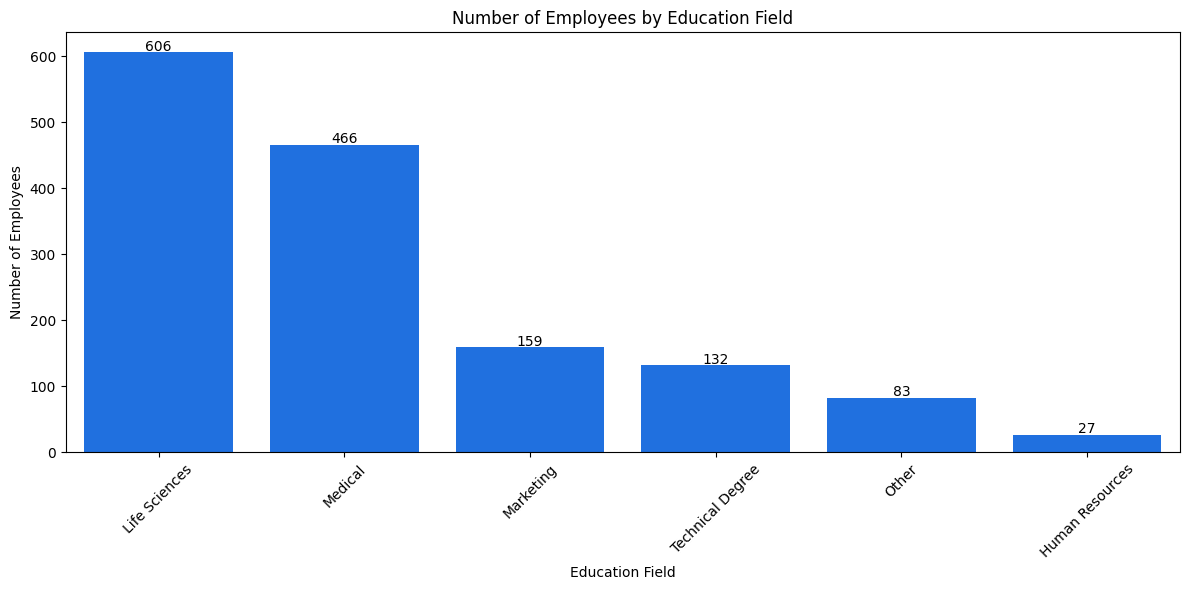

In [99]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='EducationField',
                   order=df['EducationField'].value_counts().index,
                   color="#006BFF")

plt.xticks(rotation=45)
plt.title('Number of Employees by Education Field')
plt.xlabel("Education Field")
plt.ylabel("Number of Employees")

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 2,
            int(height), ha="center", fontsize=10)

plt.tight_layout()
plt.show()

Life Sciences (606 employees) and Medical (466 employees) are the most common education backgrounds among employees, together accounting for over 70% of the workforce. This indicates a strong organizational emphasis on health, science, or research-related roles.

Fields like Human Resources (27 employees) and Other (83 employees) are significantly underrepresented, suggesting either fewer hiring needs in these areas or a highly specialized workforce structure.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3317/1974075461.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='JobRole', y='MonthlyIncome',


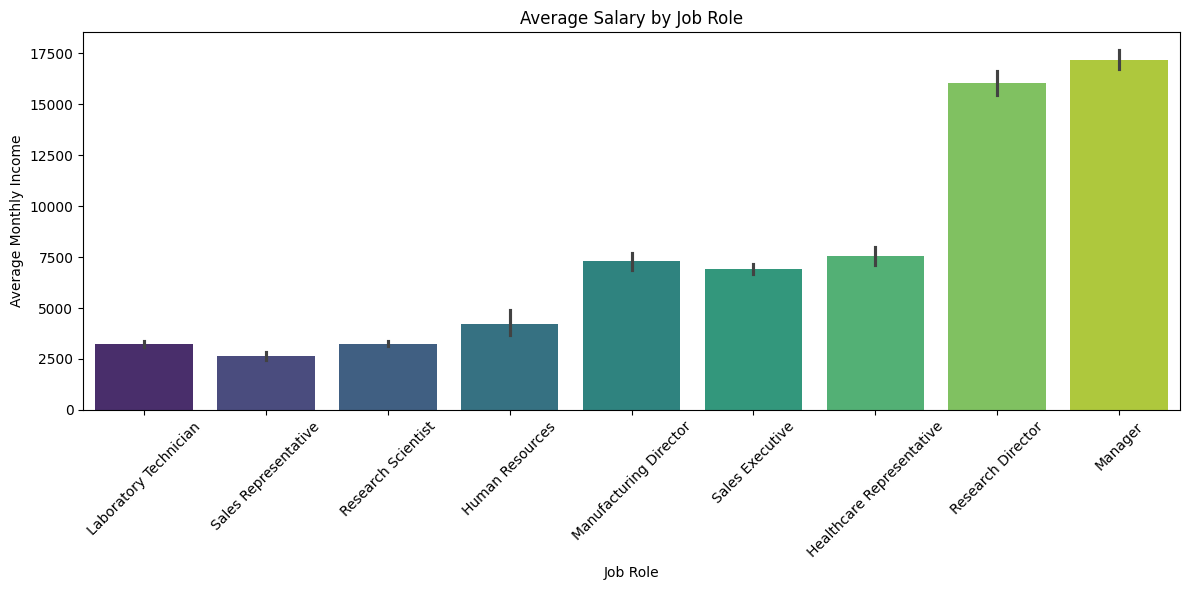

In [100]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='JobRole', y='MonthlyIncome', 
            estimator='mean', palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Salary by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Monthly Income')
plt.tight_layout()
plt.show()


Managers receive the highest average monthly income, followed by Research Directors, indicating top-tier leadership and specialized roles are most highly compensated.

Healthcare Representatives and Sales Executives also earn above-average incomes, likely due to performance-driven incentives.

Sales Representatives and Laboratory Technicians earn the least, suggesting these roles are more entry-level or operational.

The income distribution highlights a strong correlation between job seniority/responsibility and compensation.

### Analyzing Employee Compensation and Longevity

In [101]:
travel_freq = df["BusinessTravel"].value_counts()
travel_freq

BusinessTravel
Travel_Rarely        1038
Travel_Frequently     278
Non-Travel            150
TravelRarely            7
Name: count, dtype: int64

In [102]:
df['BusinessTravel'] = df["BusinessTravel"].replace('TravelRarely','Travel_Rarely')

In [103]:
travel_freq= df["BusinessTravel"].value_counts()
travel_freq

BusinessTravel
Travel_Rarely        1045
Travel_Frequently     278
Non-Travel            150
Name: count, dtype: int64

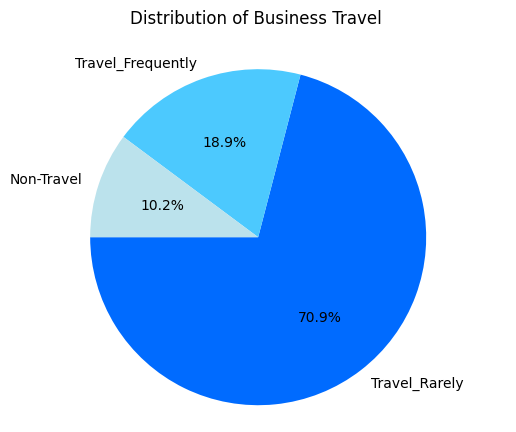

In [104]:
plt.pie(travel_freq, 
       labels = travel_freq.index,
       autopct='%1.1f%%',
       startangle=180,
       colors = ["#006BFF","#4CC9FE","#BBE2EC"])

plt.title('Distribution of Business Travel \n')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

The majority of employees (72%) travel occasionally for business, indicating that some travel is a common part of their roles. A smaller group (19%) travels frequently, likely in client-facing or field roles. Only 10% do not travel at all, suggesting most positions involve at least occasional travel.

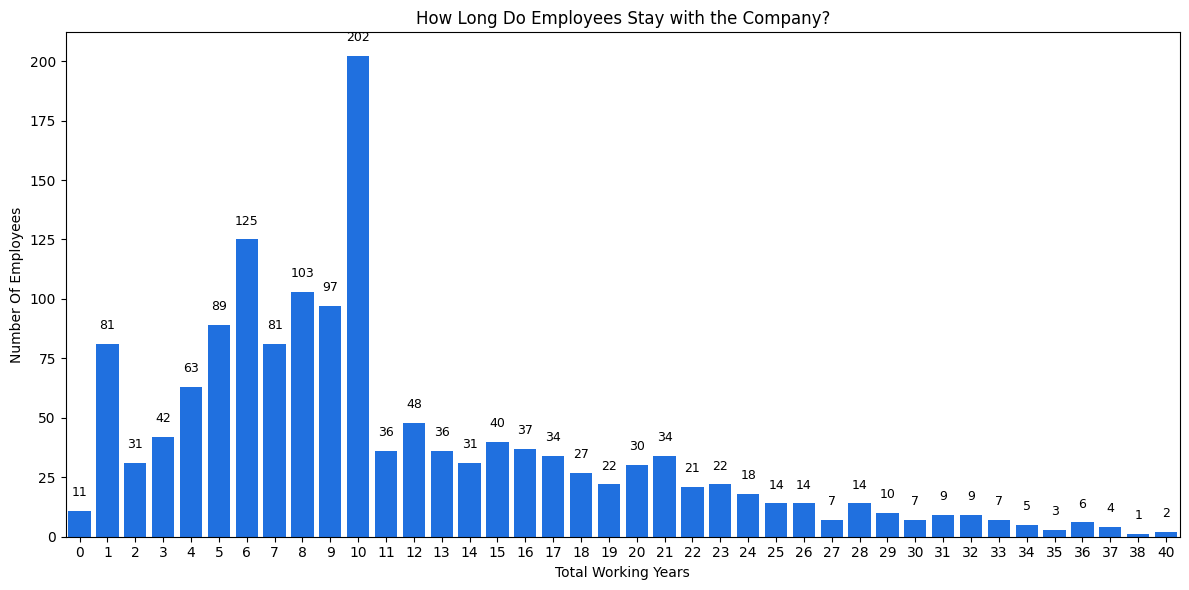

In [105]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x="TotalWorkingYears", color="#006BFF")

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 5,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9)

plt.title("How Long Do Employees Stay with the Company?")
plt.xlabel("Total Working Years")
plt.ylabel("Number Of Employees")
plt.tight_layout()
plt.show()

Most employees have 10 or fewer total working years, with a peak at 10 years (202 employees). This suggests a workforce made up mostly of early- to mid-career professionals. After 10 years, the number of employees drops sharply, indicating lower retention in longer tenures. Very few employees have over 30 years of experience, highlighting a small presence of long-term veterans

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3317/2761223570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='JobLevel', y='DailyRate', palette=custom_palette)
/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3317/2761223570.py:2: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='JobLevel', y='DailyRate', palette=custom_palette)


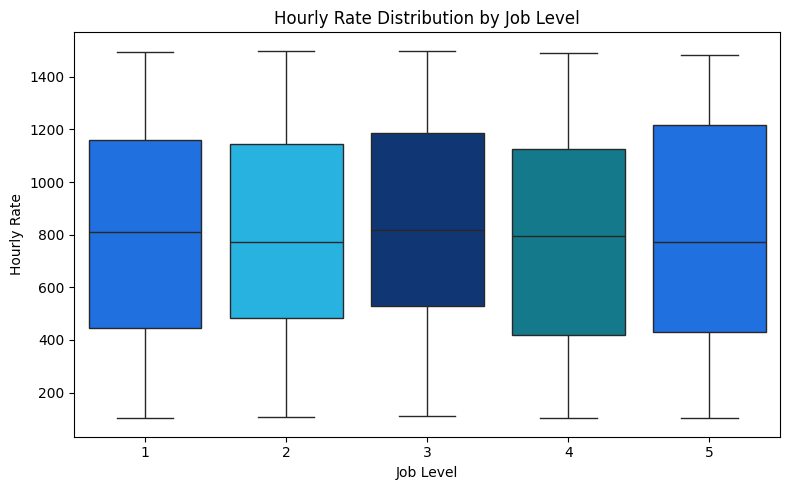

In [106]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='JobLevel', y='DailyRate', palette=custom_palette)

plt.title('Hourly Rate Distribution by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Hourly Rate')
plt.tight_layout()
plt.show()

The distribution of hourly rates is fairly consistent across all job levels, with similar medians and ranges. Despite expectations, higher job levels do not show significantly higher median rates. This could suggest a flat compensation structure or additional income being delivered through other means like bonuses or benefits rather than hourly pay

In [107]:
df["HourlyRate"].describe()

count    1473.000000
mean       65.833673
std        20.350032
min        30.000000
25%        48.000000
50%        66.000000
75%        83.000000
max       100.000000
Name: HourlyRate, dtype: float64

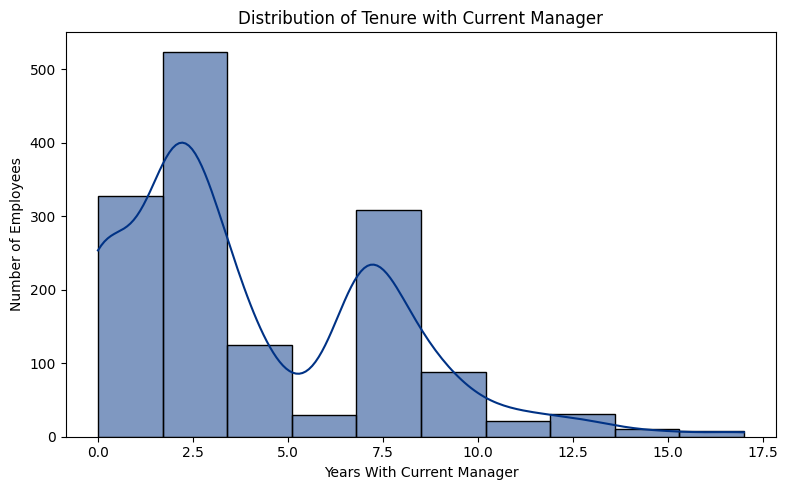

In [108]:

plt.figure(figsize=(8, 5))
sns.histplot(df['YearsWithCurrManager'], bins=10, kde=True, color='#003285')
plt.title('Distribution of Tenure with Current Manager')
plt.xlabel('Years With Current Manager')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

Most employees have been with their current manager for 2 to 3 years, indicating a relatively high manager turnover or role mobility. A secondary peak around 7-8 years suggests a smaller group of long-term manager-employee relationships. The sharp drop-off beyond 10 years shows long tenures are rare.

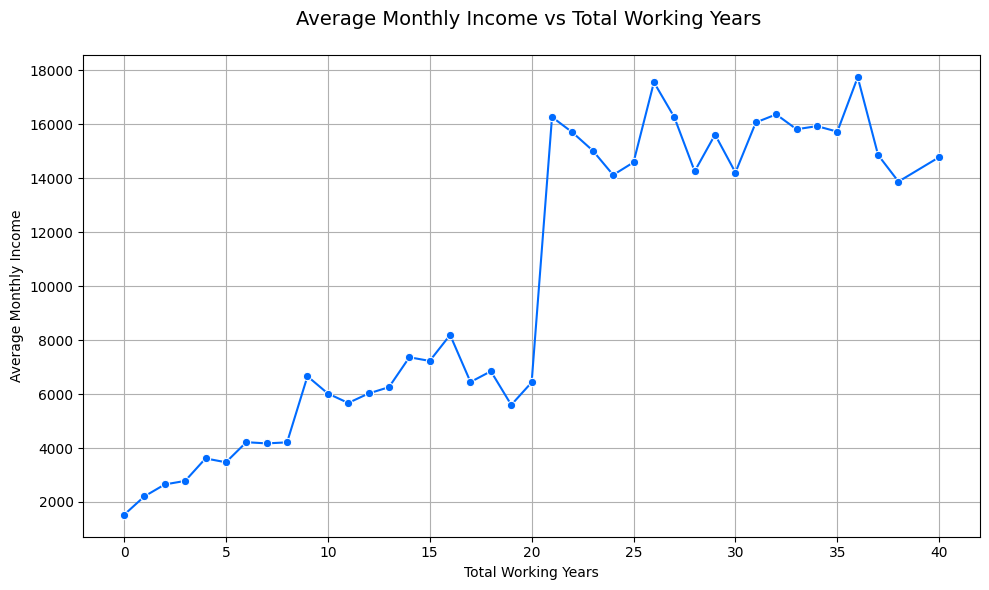

In [109]:
# Group by TotalWorkingYears and calculate average MonthlyIncome
income_by_experience = df.groupby('TotalWorkingYears')['MonthlyIncome'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=income_by_experience, x='TotalWorkingYears', y='MonthlyIncome', marker='o', color='#006BFF')

plt.title('Average Monthly Income vs Total Working Years \n', fontsize=14)
plt.xlabel('Total Working Years')
plt.ylabel('Average Monthly Income')
plt.grid(True)
plt.tight_layout()
plt.show()

Average monthly income increases steadily with total working years, with a significant jump around the 20-year mark, likely reflecting transitions to senior or executive roles. Afterward, income plateaus with minor fluctuations, suggesting a salary ceiling beyond that point.

/var/folders/yb/g6h5659x6z78yqc35_kfmpfm0000gn/T/ipykernel_3317/4023753149.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_hourly, x='HourlyRate', y='JobRole', palette='crest')


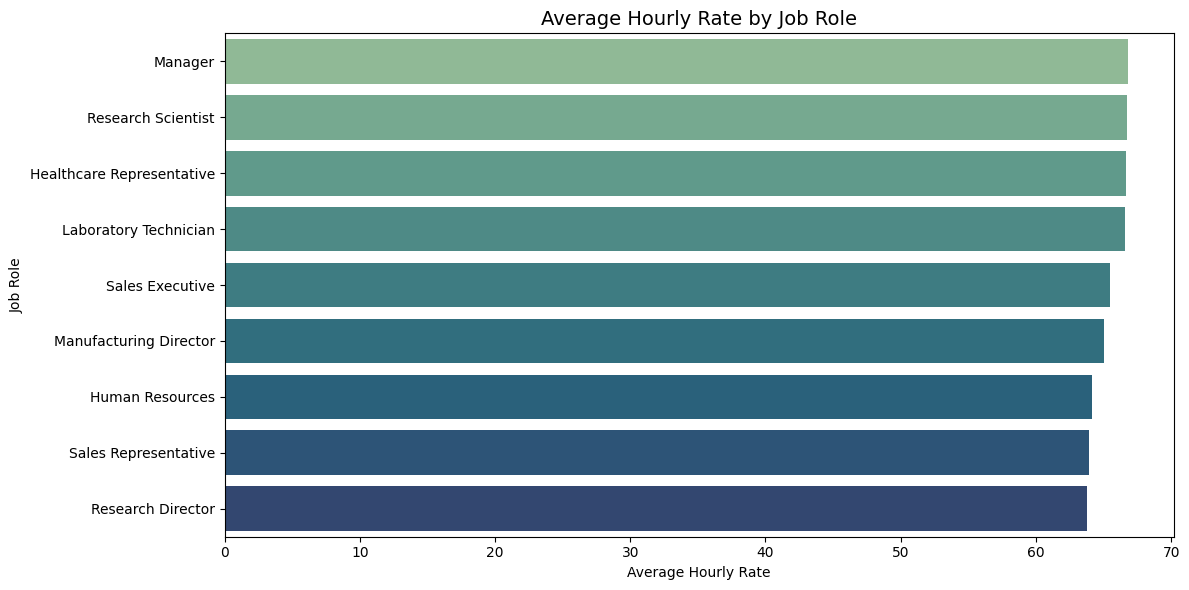

In [110]:
# Group by JobRole and calculate average HourlyRate
avg_hourly = df.groupby('JobRole')['HourlyRate'].mean().reset_index().sort_values(by='HourlyRate', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_hourly, x='HourlyRate', y='JobRole', palette='crest')

plt.title('Average Hourly Rate by Job Role', fontsize=14)
plt.xlabel('Average Hourly Rate')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()

The average hourly rate varies across job roles, with Managers and Research Scientists commanding the highest rates, while Research Directors and Sales Representatives receive the lowest. This may reflect role-specific responsibilities, demand, and experience levels required.

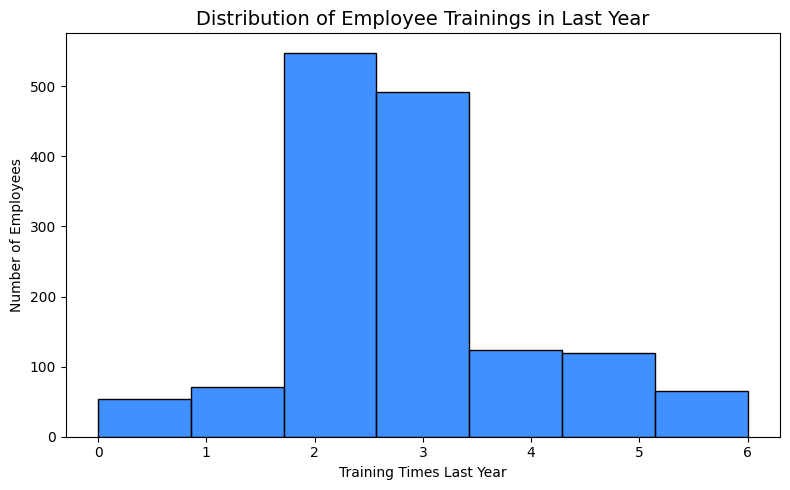

In [112]:
plt.figure(figsize=(8, 5))
sns.histplot(df['TrainingTimesLastYear'], bins=7, kde=False, color='#006BFF')

plt.title('Distribution of Employee Trainings in Last Year', fontsize=14)
plt.xlabel('Training Times Last Year')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

The majority of employees received 2 to 3 training sessions last year, indicating a focus on moderate skill development. Very few employees had either no training or more than 4 sessions, suggesting limited emphasis on either minimal or intensive training programs.

In [113]:
# update the dataset with the new changes and save it as new file 
df.to_csv("updated_HR.csv", index=False)